### Graph Plotting across scales

In [1]:
from multiplot import feature_plot
from collections import OrderedDict

import pickle
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

import matplotlib
matplotlib.rc('font', **font)

cols = ['#000000','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#ffd700', '#00ced1']
basedir = '/Users/gkiar/code/ocp/dataset_variance/data/graphs/'
figsdir = '/Users/gkiar/code/ocp/dataset_variance/figs/graphs/'
atlases = [f for f in os.listdir(basedir) if not os.path.isfile(os.path.join(basedir, f))]
metrics = {'ccoefs.pkl': 'Clustering Coefficient Distribution',
           'centrality.pkl': 'Betweenness Centrality Distribution',
           'degree.pkl': 'Degree Distribution',
           'edgeweight.pkl': 'Edge Weight Distribution',
           'eigs.pkl': 'Eigen Value Sequence',
           'nnz.pkl': 'Number of Non-Zero Edges',
           'ss1.pkl': 'Scan Statistic-1 Distribution'}
# metrics = {'edgeweight.pkl': 'Edge Weight Distribution'}

In [2]:
atlases = (('AAL', 116),
          ('CPAC200', 200),
          ('desikan', 70),
          ('DS00071', 70),
          ('DS00096', 95),
          ('DS00108', 107),
          ('DS00140', 139),
          ('DS00195', 194),
          ('DS00278', 277),
          ('DS00350', 349),
          ('DS00446', 445),
          ('DS00583', 582),
          ('HarvardOxford', 111),
          ('JHU', 48),
          ('Talairach', 1105))
atlases = OrderedDict(atlases)

Eigen Value Sequence


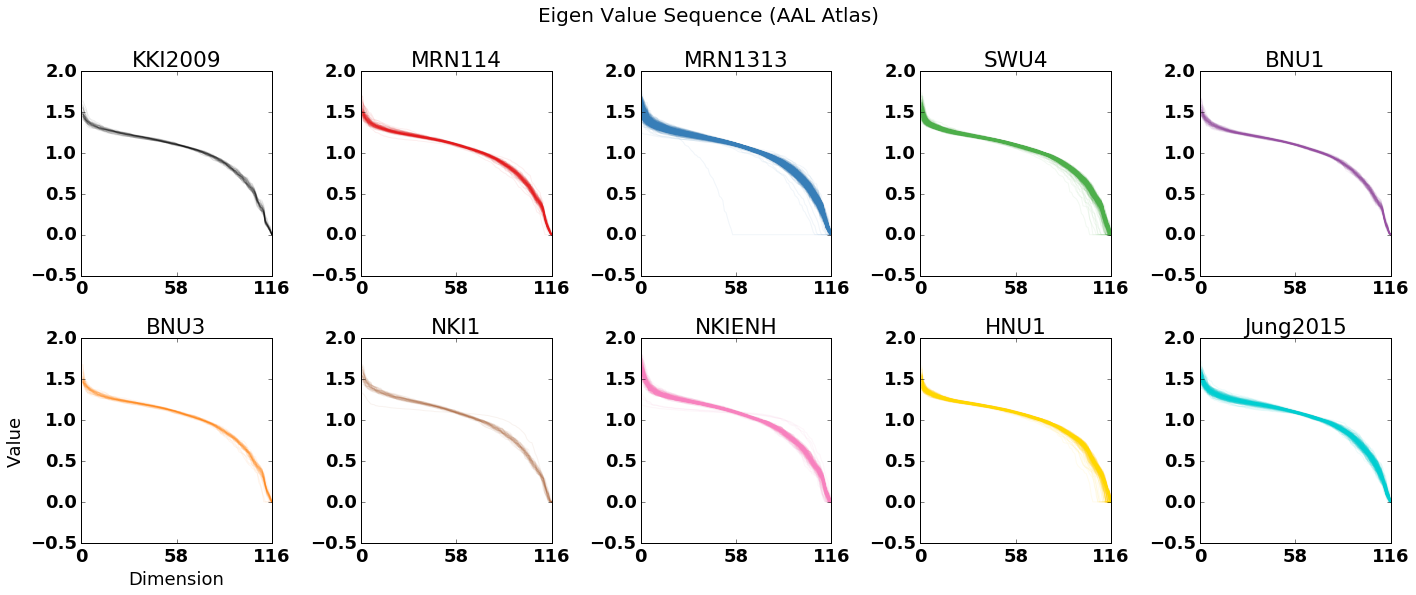

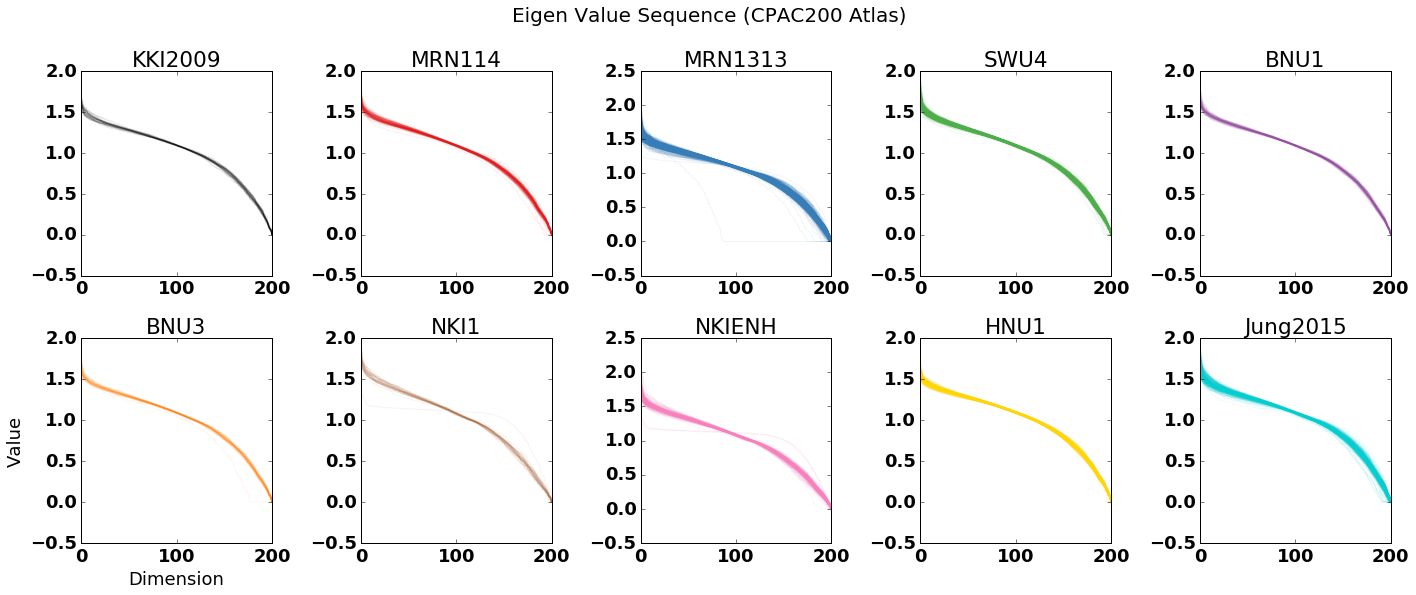

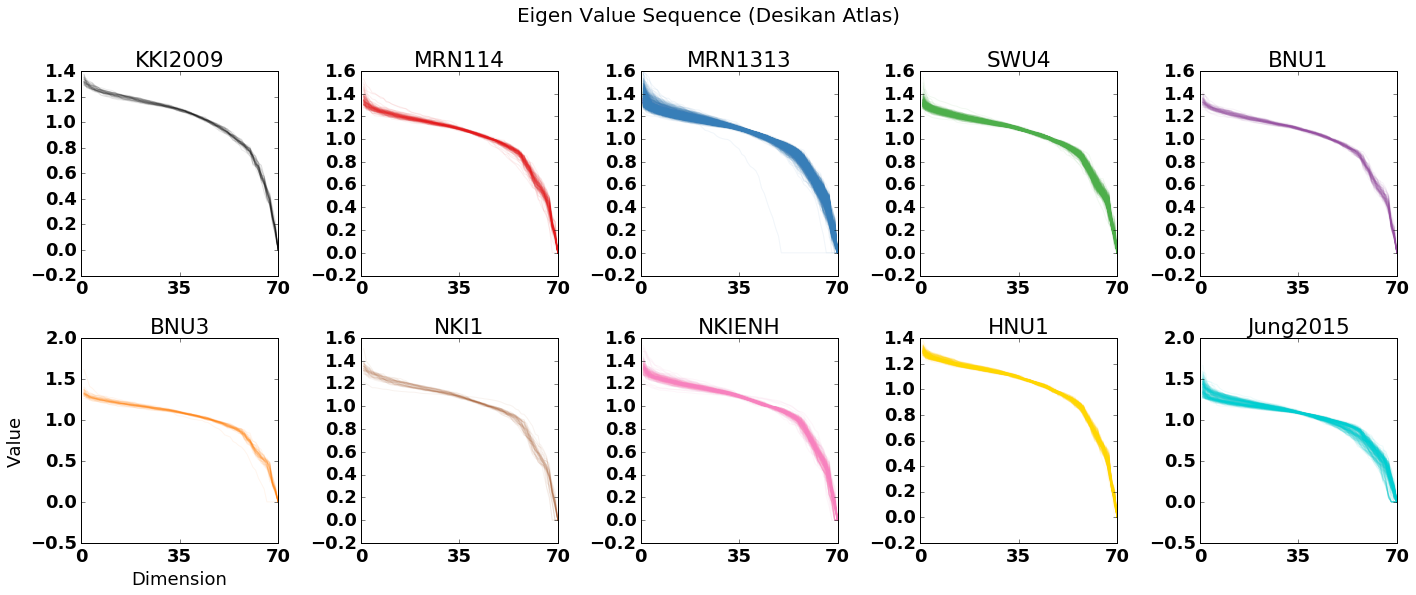

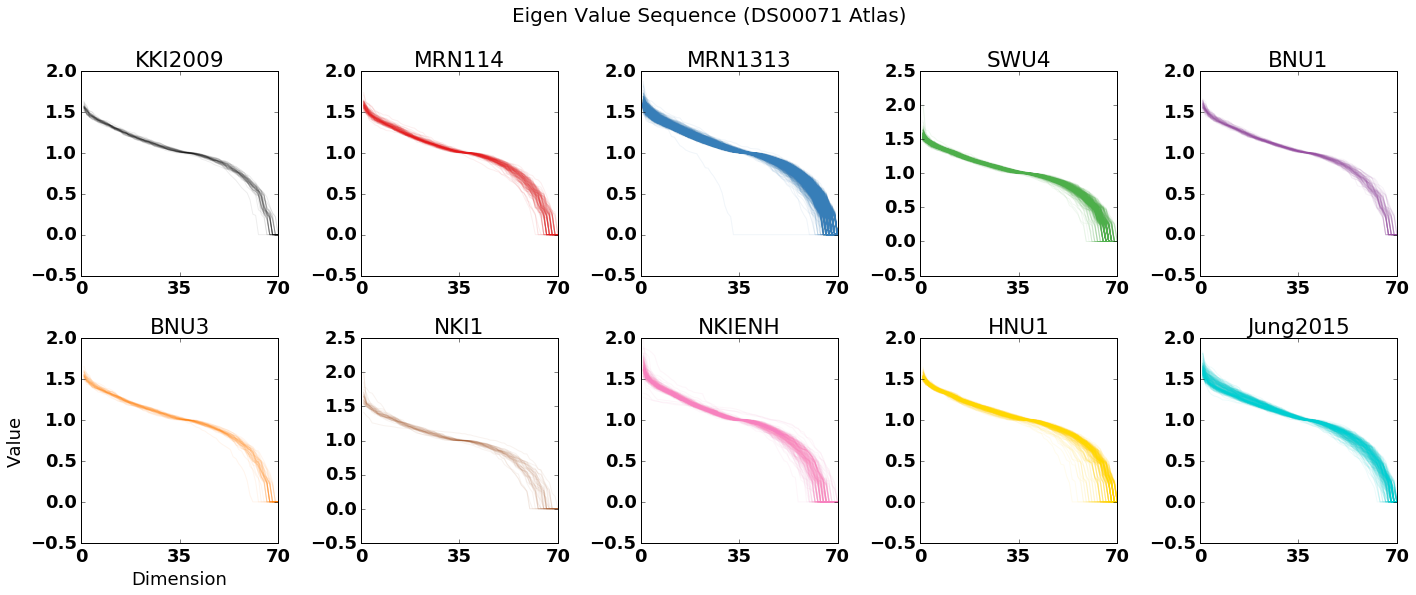

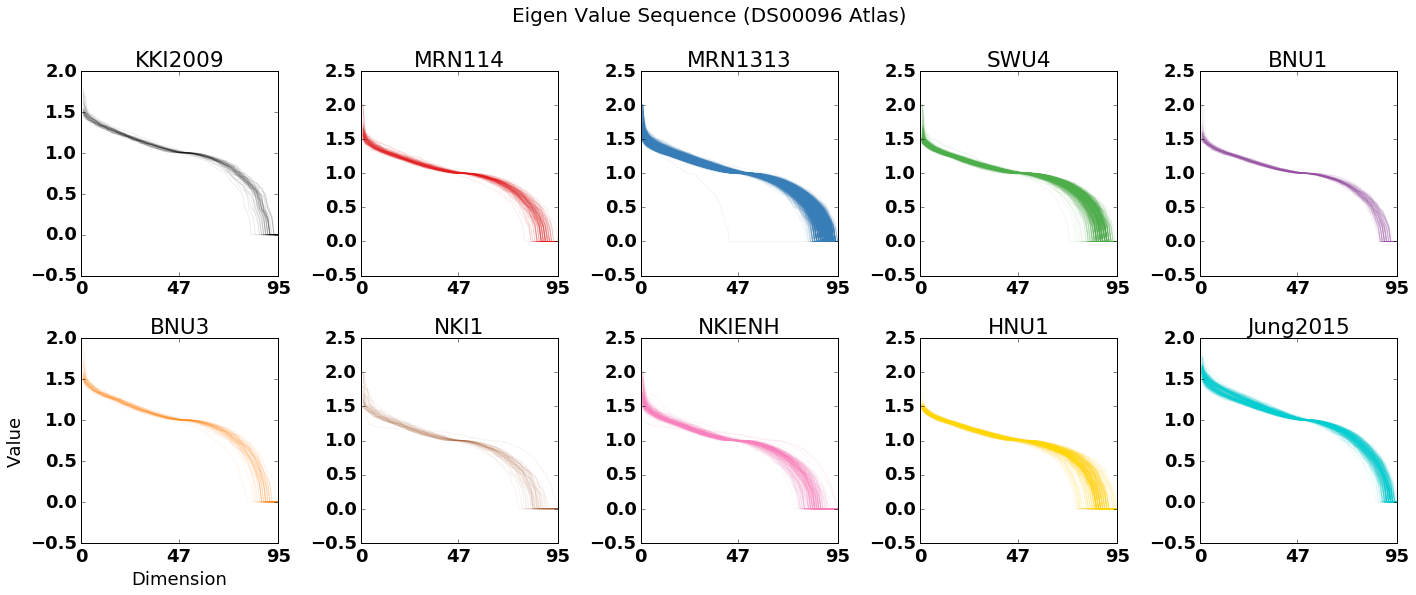

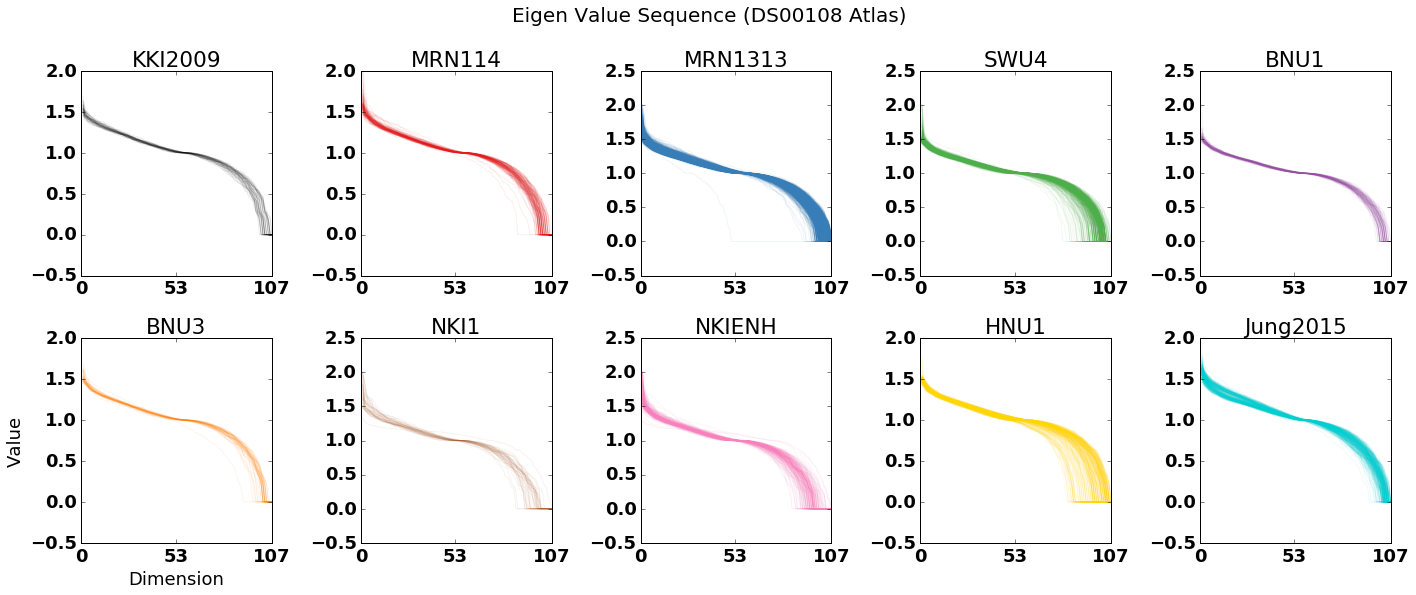

In [ ]:
for key in metrics:
    print(metrics[key])
    metrdir = os.path.join(figsdir, key.split('.')[0])
    os.system('mkdir -p ' + metrdir)
    for atlas in atlases:
        fn = os.path.join(basedir, atlas, atlas+'_'+key)
        fil = open(fn)
        dat = pickle.load(fil)[key.split('.')[0]]
        fil.close()
        dnames = dat.keys()
        
        xv = None
        xlims = None
        axis_scale = None
        xlab = None
        yscale = None
        if key.split('.')[0] == 'nnz':
            pm = 'scatter'
            ylab = 'Count'
        elif key.split('.')[0] == 'eigs':
            pm = 'series'
            ylab = 'Value'
            xlab = 'Dimension'
            xlims = [0, atlases[atlas]]
            xv = [0, int(xlims[1]/2), xlims[1]]
        else:
            pm = 'hist'
            ylab = 'Density'
            xlab = 'Value'
            if key.split('.')[0] == 'degree':
                xlims = [0, atlases[atlas]]
                xv = [0, int(xlims[1]/2), xlims[1]]
            elif key.split('.')[0] == 'edgewight':
                yscale = 1000
                ylab = 'Density (E-3)'
                axis_scale = 'log'
            elif key.split('.')[0] == 'centrality':
                axis_scale = 'log'
            elif key.split('.')[0] == 'ss1':
                yscale = 1000000
                ylab = 'Density (E-6)'
                axis_scale = 'log'
        
        if atlas == 'desikan':
            atlas = atlas.title()
        tit = metrics[key] + ' (' + atlas + ' Atlas)'
        outf = os.path.join(metrdir, atlas + '_' + key.split('.')[0] + '.png')
        
        feature_plot(dat, dnames, tit, plot_mode=pm, ylab=ylab, xlab=xlab, axis_scale=axis_scale,
                     xlims=xlims, xv=xv, yscale=yscale, color=cols, fig_outfile=outf)